In [1]:
# ==============================================================================
# ETAPA 1: SETUP E ANÁLISE EXPLORATÓRIA INICIAL 
# ==============================================================================

# --- 1.1: Importação das bibliotecas ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Optional
import os

# Define o caminho raiz do projeto (um nível acima da pasta 'notebooks')
PROJECT_ROOT = '..'

# --- Diretórios Principais ---
DATA_DIR = os.path.join(PROJECT_ROOT, 'data')
REPORTS_DIR = os.path.join(PROJECT_ROOT, 'reports')
EXPORT_DIR = os.path.join(PROJECT_ROOT, 'export') # Para os CSVs exportados

# --- Subdiretórios de Imagens ---
EDA_IMG_DIR = os.path.join(REPORTS_DIR, 'imagens_eda')
ANALYSIS_IMG_DIR = os.path.join(REPORTS_DIR, 'imagens_analise')

# --- Caminhos de Arquivos Específicos ---
RAW_DATA_PATH = os.path.join(DATA_DIR, 'song_lyrics.csv')
CACHE_PATH = os.path.join(DATA_DIR, 'lyrics_with_sentiment.parquet')

# Configurações de visualização
pd.set_option('display.max_columns', 50)
sns.set_style('whitegrid')
print("Caminhos e configurações definidos.")

# Imprime os caminhos para verificação
print(f"Caminho do arquivo de dados: {RAW_DATA_PATH}")
print(f"Caminho do arquivo de cache: {CACHE_PATH}")
print(f"Caminho para imagens da EDA: {EDA_IMG_DIR}")
print(f"Caminho para imagens da Análise: {ANALYSIS_IMG_DIR}")

def load_data(file_path: str) -> Optional[pd.DataFrame]:
    """
    Carrega os dados de um arquivo CSV para um DataFrame do pandas.

    Esta função encapsula a lógica de carregamento de dados, incluindo o
    tratamento de erros comuns como arquivo não encontrado ou problemas de
    leitura.

    Args:
        file_path (str): O caminho para o arquivo CSV a ser carregado.

    Returns:
        Optional[pd.DataFrame]: Um DataFrame do pandas contendo os dados
        carregados, ou None se ocorrer um erro durante o carregamento.

    Edge Cases:
        - Caminho do arquivo inválido: Se o `file_path` não existir, uma
          exceção `FileNotFoundError` será capturada e uma mensagem de erro
          será exibida.
        - Arquivo corrompido ou mal formatado: Se o arquivo não for um CSV
          válido, o pandas pode lançar um `ParserError`. A exceção genérica
          `Exception` captura isso e outros problemas inesperados.
        - Problemas de codificação: O arquivo pode não estar em UTF-8. Se um
          `UnicodeDecodeError` ocorrer, pode ser necessário especificar o
          parâmetro `encoding` (ex: `encoding='latin1'`) na chamada
          `pd.read_csv`.
        - Memória insuficiente: Carregar um arquivo muito grande pode exceder
          a memória RAM disponível, resultando em um `MemoryError`.
    """
    print(f"Tentando carregar os dados de: {file_path}")
    try:
        df = pd.read_csv(file_path, on_bad_lines='warn')
        print("Dados carregados com sucesso.")
        return df
    except FileNotFoundError:
        print(f"ERRO: O arquivo não foi encontrado no caminho especificado '{file_path}'.")
        print("Por favor, verifique se o nome do arquivo e o diretório estão corretos.")
        return None
    except Exception as e:
        print(f"ERRO: Ocorreu um erro inesperado ao carregar o arquivo: {e}")
        print("O arquivo pode estar corrompido, mal formatado ou com uma codificação de caracteres incompatível.")
        return None

def inspect_dataframe(df: Optional[pd.DataFrame], df_name: str = "DataFrame") -> None:
    """
    Exibe um resumo completo de um DataFrame para inspeção inicial.

    A função imprime as primeiras linhas, informações gerais sobre as colunas
    (tipos e contagem não nula), um resumo estatístico das colunas numéricas
    e a contagem de valores nulos.

    Args:
        df (Optional[pd.DataFrame]): O DataFrame a ser inspecionado.
        df_name (str): Um nome descritivo para o DataFrame, usado nos
                       cabeçalhos da saída.

    Returns:
        None. A função apenas imprime informações no console.

    Edge Cases:
        - DataFrame nulo: Se o `df` de entrada for `None` (por exemplo, devido
          a uma falha no carregamento), a função informará que a inspeção não
          pode ser realizada.
        - DataFrame vazio: Se o `df` estiver vazio (`df.empty` é True), os
          métodos do pandas ainda funcionarão, mas produzirão saídas vazias ou
          com zeros, o que é um comportamento esperado.
        - Ausência de colunas numéricas: Se o `df` não tiver colunas numéricas,
          o método `.describe()` produzirá um resumo das colunas de objeto
          (categóricas), focando em contagem, valores únicos e frequência.
    """
    print("\n" + "="*50)
    print(f"INICIANDO INSPEÇÃO DA '{df_name}'")
    print("="*50)

    if df is None:
        print("Inspeção não pode ser realizada: o DataFrame fornecido é None.")
        return

    if df.empty:
        print("Aviso: O DataFrame está vazio.")

    # Mostra as 5 primeiras linhas para entender as colunas
    print("\n--- 1. Amostra dos Dados (5 primeiras linhas) ---")
    print(df.head())

    # Fornece um resumo técnico: tipos de dados, valores não nulos, uso de memória
    print("\n--- 2. Informações Gerais sobre as Colunas (Tipos e Nulos) ---")
    df.info()

    # Mostra um resumo estatístico das colunas numéricas
    print("\n--- 3. Resumo Estatístico (Colunas Numéricas) ---")
    print(df.describe())

    # Conta a quantidade de valores nulos em cada coluna
    print("\n--- 4. Contagem de Valores Nulos por Coluna ---")
    print(df.isnull().sum())
    
    print("\n" + "="*50)
    print("INSPEÇÃO FINALIZADA")
    print("="*50)


# ==============================================================================
# BLOCO DE EXECUÇÃO PRINCIPAL
# ==============================================================================

# 1. Carregar os dados
raw_lyrics_df = load_data(RAW_DATA_PATH)

# 2. Inspecionar o DataFrame carregado
inspect_dataframe(raw_lyrics_df, df_name="Base de Dados de Letras de Música")

Caminhos e configurações definidos.
Caminho do arquivo de dados: ..\data\song_lyrics.csv
Caminho do arquivo de cache: ..\data\lyrics_with_sentiment.parquet
Caminho para imagens da EDA: ..\reports\imagens_eda
Caminho para imagens da Análise: ..\reports\imagens_analise
Tentando carregar os dados de: ..\data\song_lyrics.csv
Dados carregados com sucesso.

INICIANDO INSPEÇÃO DA 'Base de Dados de Letras de Música'

--- 1. Amostra dos Dados (5 primeiras linhas) ---
               title  tag     artist  year   views  \
0          Killa Cam  rap    Cam'ron  2004  173166   
1         Can I Live  rap      JAY-Z  1996  468624   
2  Forgive Me Father  rap   Fabolous  2003    4743   
3       Down and Out  rap    Cam'ron  2004  144404   
4             Fly In  rap  Lil Wayne  2005   78271   

                                       features  \
0                   {"Cam\\'ron","Opera Steve"}   
1                                            {}   
2                                            {}   
3  {"Cam

Recurso NLTK 'stopwords' já está disponível.
Recurso NLTK 'vader_lexicon' já está disponível.

--- Iniciando Pré-processamento e Limpeza AVANÇADA dos Dados ---
Tamanho original do DataFrame: 5134856 linhas
Tamanho após filtrar por idioma 'en': 3374198 linhas
Tamanho após filtrar por anos válidos: 3348447 linhas
Tamanho após remover a tag 'misc': 3227096 linhas
Excluindo artistas especificados manualmente: Genius English Translations, Guided by Voices, Holy Bible (KJV), Abraham Lincoln
Tamanho após excluir artistas manualmente: 3212327 linhas
Filtrando músicas com menos de 1000 visualizações...
Tamanho após filtrar por visualizações: 543294 linhas
Tamanho após remover por indicadores de título/artista: 543049 linhas
Aplicando limpeza de texto na coluna 'lyrics'...
Colunas 'lyrics_clean' e 'lyrics_length' criadas.

Pré-processamento AVANÇADO concluído. Total de linhas removidas: 4591807

--- Gerando e Salvando Gráficos da Análise Exploratória ---


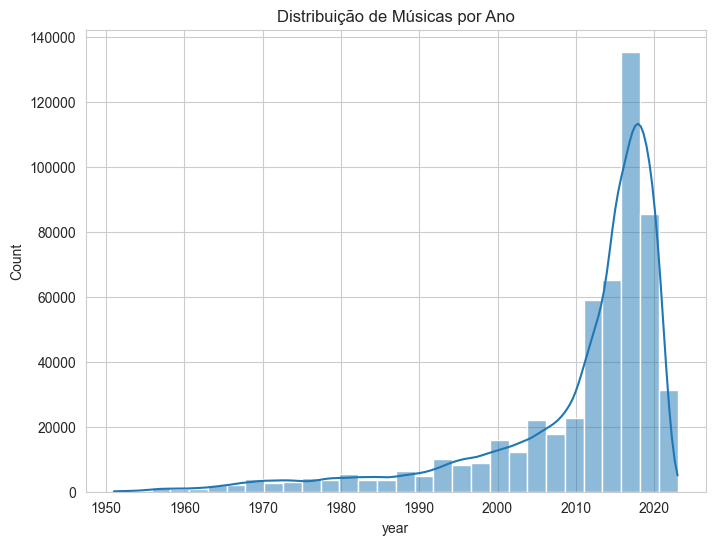

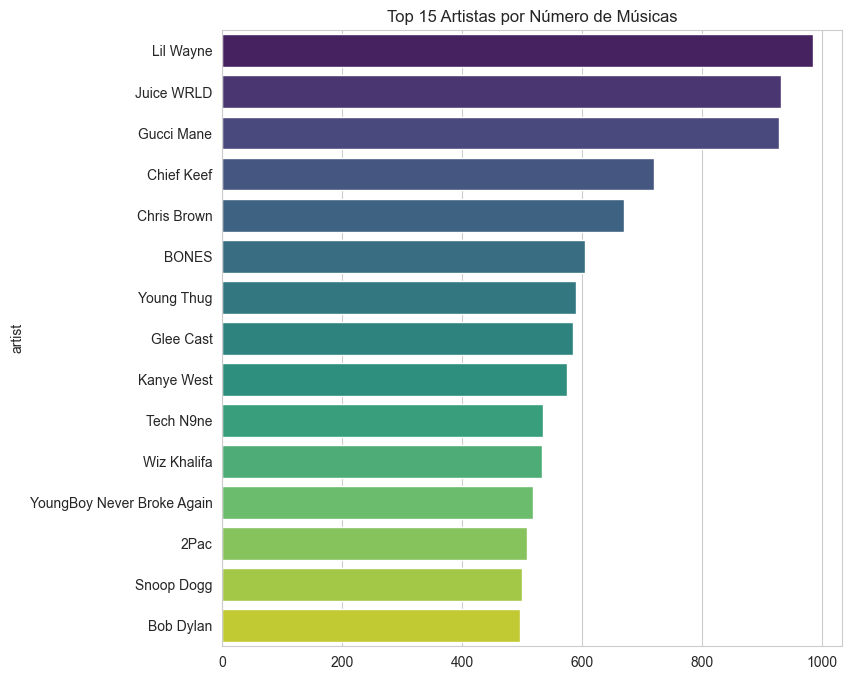

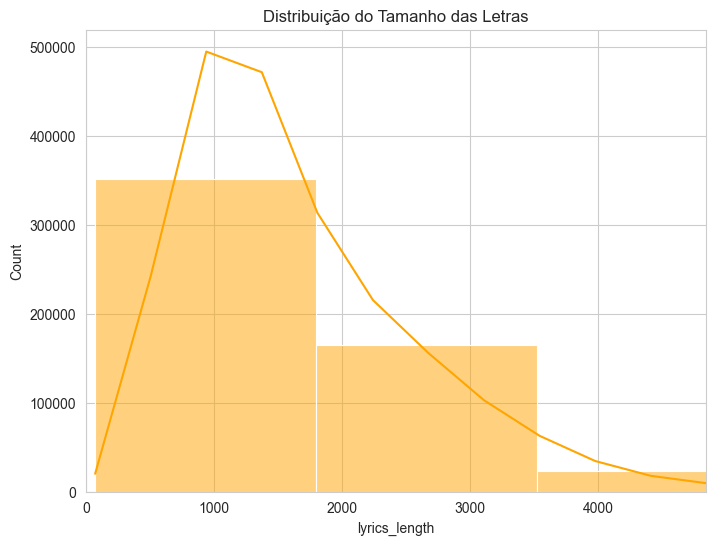


Gráficos salvos com sucesso na pasta '..\reports\imagens_eda'.

Pipeline de EDA (Etapa 2) concluído com sucesso.

--- TESTE DE VARIÁVEL AO FINAL DA CÉLULA 2 ---
>>> SUCESSO: A variável 'processed_lyrics_df' EXISTE no final da Célula 2.
>>> TIPO: <class 'pandas.core.frame.DataFrame'>
>>> AMOSTRA (2 LINHAS):
        title  tag   artist  year   views                     features  \
0   Killa Cam  rap  Cam'ron  2004  173166  {"Cam\\'ron","Opera Steve"}   
1  Can I Live  rap    JAY-Z  1996  468624                           {}   

                                              lyrics  id language_cld3  \
0  [Chorus: Opera Steve & Cam'ron]\nKilla Cam, Ki...   1            en   
1  [Produced by Irv Gotti]\n\n[Intro]\nYeah, hah,...   3            en   

  language_ft language                                       lyrics_clean  \
0          en       en  killa cam killa cam cam killa cam killa cam ki...   
1          en       en  yeah hah yeah rocafella we invite you to somet...   

   lyrics_len

In [2]:
# ==============================================================================
# ETAPA 2: PRÉ-PROCESSAMENTO E VISUALIZAÇÃO DA EDA (VERSÃO CORRIGIDA PARA NOTEBOOK)
# ==============================================================================

# --- 2.1: Importação das bibliotecas (algumas podem ser redundantes se já importadas) ---
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from typing import List, Optional

# --- 2.2: Definição das Funções da Etapa 2 ---

def setup_nltk_resources():
    """Verifica e baixa os recursos necessários da biblioteca NLTK."""
    resources = {'stopwords': 'corpora/stopwords', 'vader_lexicon': 'sentiment/vader_lexicon.zip'}
    for resource_name, resource_path in resources.items():
        try:
            nltk.data.find(resource_path)
            print(f"Recurso NLTK '{resource_name}' já está disponível.")
        except LookupError:
            print(f"Baixando recurso NLTK '{resource_name}'...")
            nltk.download(resource_name)

def _clean_lyrics_text(text: str) -> str:
    """Função auxiliar para limpar o texto de uma única letra de música."""
    if not isinstance(text, str): return ""
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = text.replace('\\n', ' ')
    text = re.sub(r'[^a-z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def preprocess_data(
    df: pd.DataFrame, 
    artists_to_exclude: List[str] = [], 
    min_views: int = 0
) -> Optional[pd.DataFrame]:
    """
    Aplica um pipeline de pré-processamento AVANÇADO a um DataFrame de letras.

    A função realiza filtragem por idioma, ano, tag 'misc', visualizações mínimas,
    exclusão de artistas, verificação de estrutura de música e limpeza de texto.

    Args:
        df (pd.DataFrame): O DataFrame bruto a ser processado.
        artists_to_exclude (List[str], optional): Lista de artistas a serem removidos.
        min_views (int, optional): O número mínimo de visualizações que uma música
                                   deve ter para ser mantida. Padrão é 0.

    Returns:
        Optional[pd.DataFrame]: Um novo DataFrame processado e pronto para análise.
    """
    if df is None or df.empty:
        print("Pré-processamento não pode ser realizado: DataFrame de entrada é nulo ou vazio.")
        return None

    print("\n--- Iniciando Pré-processamento e Limpeza AVANÇADA dos Dados ---")
    df_processed = df.copy()
    initial_rows = len(df_processed)
    print(f"Tamanho original do DataFrame: {initial_rows} linhas")

    # =======================================================
    # ETAPA DE FILTRAGEM DE DADOS
    # =======================================================

    # Filtro 1: Idioma
    df_processed = df_processed[df_processed['language'] == 'en']
    print(f"Tamanho após filtrar por idioma 'en': {len(df_processed)} linhas")

    # Filtro 2: Ano
    df_processed = df_processed[(df_processed['year'] > 1950) & (df_processed['year'] < 2025)]
    print(f"Tamanho após filtrar por anos válidos: {len(df_processed)} linhas")
    
    # Filtro 3: Remove a tag 'misc'
    if 'tag' in df_processed.columns:
        # Garante que a coluna 'tag' não tenha valores nulos que possam quebrar o filtro
        df_processed = df_processed[df_processed['tag'].fillna('') != 'misc']
        print(f"Tamanho após remover a tag 'misc': {len(df_processed)} linhas")
    
    # Filtro 4: Exclusão manual de artistas
    if artists_to_exclude:
        print(f"Excluindo artistas especificados manualmente: {', '.join(artists_to_exclude)}")
        df_processed = df_processed[~df_processed['artist'].isin(artists_to_exclude)]
        print(f"Tamanho após excluir artistas manualmente: {len(df_processed)} linhas")

    # Filtro 5: Número mínimo de visualizações
    if min_views > 0:
        print(f"Filtrando músicas com menos de {min_views} visualizações...")
        df_processed = df_processed[df_processed['views'] >= min_views]
        print(f"Tamanho após filtrar por visualizações: {len(df_processed)} linhas")
    
    # Filtro 6: Indicadores de texto não-musical
    non_music_indicators = ['holy bible', 'torah', 'quran', 'book of', 'chapter', 'commentary']
    mask_to_remove = (
        df_processed['artist'].str.contains('|'.join(non_music_indicators), case=False, na=False) |
        df_processed['title'].str.contains('|'.join(non_music_indicators), case=False, na=False)
    )
    df_processed = df_processed[~mask_to_remove]
    print(f"Tamanho após remover por indicadores de título/artista: {len(df_processed)} linhas")

    # =======================================================
    # ETAPA DE PROCESSAMENTO DE TEXTO
    # =======================================================
    print("Aplicando limpeza de texto na coluna 'lyrics'...")
    df_processed['lyrics_clean'] = df_processed['lyrics'].apply(_clean_lyrics_text)
    df_processed['lyrics_length'] = df_processed['lyrics_clean'].str.len()
    print("Colunas 'lyrics_clean' e 'lyrics_length' criadas.")
    
    final_rows = len(df_processed)
    print(f"\nPré-processamento AVANÇADO concluído. Total de linhas removidas: {initial_rows - final_rows}")
    return df_processed

def generate_eda_visualizations(df: pd.DataFrame, output_dir: str = "imagens_eda") -> None:
    """Gera e salva um conjunto de visualizações para a Análise Exploratória de Dados."""
    if df is None or df.empty:
        print("Geração de visualizações não pode ser realizada: DataFrame é nulo ou vazio.")
        return
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"Diretório '{output_dir}' criado.")
    print("\n--- Gerando e Salvando Gráficos da Análise Exploratória ---")
    
    # Gráficos... (código dos gráficos permanece o mesmo)
    plt.figure(figsize=(8, 6)); sns.histplot(data=df, x='year', bins=30, kde=True); plt.title('Distribuição de Músicas por Ano'); plt.savefig(os.path.join(output_dir, 'grafico_distribuicao_ano.png'), dpi=300, bbox_inches='tight'); plt.show()
    plt.figure(figsize=(8, 8)); top_artists = df['artist'].value_counts().nlargest(15); sns.barplot(x=top_artists.values, y=top_artists.index, hue=top_artists.index, palette='viridis', legend=False); plt.title('Top 15 Artistas por Número de Músicas'); plt.savefig(os.path.join(output_dir, 'grafico_top_artistas.png'), dpi=300, bbox_inches='tight'); plt.show()
    plt.figure(figsize=(8, 6)); sns.histplot(df['lyrics_length'], bins=50, color='orange', kde=True); plt.title('Distribuição do Tamanho das Letras'); plt.xlim(0, df['lyrics_length'].quantile(0.99)); plt.savefig(os.path.join(output_dir, 'grafico_tamanho_letras.png'), dpi=300, bbox_inches='tight'); plt.show()  
    print(f"\nGráficos salvos com sucesso na pasta '{output_dir}'.")

# ==============================================================================
# BLOCO DE EXECUÇÃO DA ETAPA 2
# ==============================================================================

# Define as configurações específicas para esta etapa
ARTISTS_TO_EXCLUDE = ["Genius English Translations", "Guided by Voices", "Holy Bible (KJV)", "Abraham Lincoln"]
MINIMUM_VIEWS = 1000

# Setup de recursos externos
setup_nltk_resources()

# O try-except é a forma correta de verificar se a variável da célula anterior existe
try:
    # 1. Pré-processar os dados brutos (usa a variável 'raw_lyrics_df' da Célula 1)
    processed_lyrics_df = preprocess_data(raw_lyrics_df, artists_to_exclude=ARTISTS_TO_EXCLUDE, min_views=MINIMUM_VIEWS)
    
    # 2. Gerar visualizações com os dados processados
    generate_eda_visualizations(processed_lyrics_df, output_dir=EDA_IMG_DIR)
    
    print("\nPipeline de EDA (Etapa 2) concluído com sucesso.")
    # =======================================================
    # NOVO BLOCO DE TESTE DE DIAGNÓSTICO
    # =======================================================
    print("\n--- TESTE DE VARIÁVEL AO FINAL DA CÉLULA 2 ---")
    if 'processed_lyrics_df' in locals() or 'processed_lyrics_df' in globals():
        print(">>> SUCESSO: A variável 'processed_lyrics_df' EXISTE no final da Célula 2.")
        if processed_lyrics_df is not None:
            print(f">>> TIPO: {type(processed_lyrics_df)}")
            print(f">>> AMOSTRA (2 LINHAS):")
            print(processed_lyrics_df.head(2))
        else:
            print(">>> AVISO: A variável 'processed_lyrics_df' existe, mas seu valor é None (vazio).")
    else:
        print(">>> FALHA: A variável 'processed_lyrics_df' NÃO EXISTE no final da Célula 2.")
    print("--- FIM DO TESTE ---")
    # =======================================================

except NameError:
    print("\nERRO: A variável 'raw_lyrics_df' não foi encontrada.")
    print("Por favor, execute a célula da Etapa 1 (Carga de Dados) antes de executar esta célula.")

In [4]:
# ==============================================================================
# ETAPA 3: ANÁLISE DE SENTIMENTO (VERSÃO CORRIGIDA PARA NOTEBOOK COM CACHE)
# ==============================================================================

# --- 3.1: Importação das bibliotecas ---
import pandas as pd
import numpy as np
import os
from tqdm.auto import tqdm
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from typing import Optional


tqdm.pandas()
# --- 3.2: Definição das Funções da Etapa 3 ---

def calculate_sentiment_scores(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calcula os scores de sentimento para as letras de música em um DataFrame.

    Aplica o analisador VADER e cria as colunas 'polarity_score' (numérica) e
    'sentiment_category' (Positivo, Negativo, Neutro).

    Args:
        df (pd.DataFrame): O DataFrame processado contendo a coluna 'lyrics_clean'.

    Returns:
        pd.DataFrame: O DataFrame com as novas colunas de sentimento adicionadas.
    """
    if 'lyrics_clean' not in df.columns:
        print("ERRO: A coluna 'lyrics_clean' é necessária e não foi encontrada.")
        return df
        
    print("Calculando scores de sentimento com VADER. Este processo pode ser demorado...")
    
    # Garante que o recurso NLTK vader_lexicon está disponível
    try:
        sid = SentimentIntensityAnalyzer()
    except LookupError:
        print("Baixando recurso NLTK 'vader_lexicon'...")
        nltk.download('vader_lexicon')
        sid = SentimentIntensityAnalyzer()
    
    # Aplica o cálculo do score composto com uma barra de progresso
    df['polarity_score'] = df['lyrics_clean'].progress_apply(
        lambda text: sid.polarity_scores(text)['compound']
    )

    # Cria uma coluna categórica baseada no score
    conditions = [
        (df['polarity_score'] >= 0.05),
        (df['polarity_score'] <= -0.05),
    ]
    choices = ['Positivo', 'Negativo']
    df['sentiment_category'] = np.select(conditions, choices, default='Neutro')
    
    print("Cálculo de sentimento concluído.")
    return df

def get_sentiment_analysis_with_caching(
    processed_df: pd.DataFrame,
    cache_path: str = "data/lyrics_with_sentiment.parquet",
    force_recalc: bool = False
) -> Optional[pd.DataFrame]:
    """
    Obtém os resultados da análise de sentimento, utilizando um sistema de cache.

    Verifica se um arquivo de cache (.parquet) já existe. Se sim, carrega os dados
    dele. Caso contrário, executa a análise de sentimento e salva o resultado.

    Args:
        processed_df (pd.DataFrame): O DataFrame pré-processado da Etapa 2.
        cache_path (str): O caminho do arquivo para salvar/carregar o cache.
        force_recalc (bool): Se True, ignora o cache e força um novo cálculo.

    Returns:
        Optional[pd.DataFrame]: O DataFrame com scores de sentimento.
    """
    if processed_df is None:
        print("Não é possível executar a análise de sentimento: DataFrame de entrada é nulo.")
        return None

    # Garante que o diretório de cache exista
    cache_dir = os.path.dirname(cache_path)
    if cache_dir and not os.path.exists(cache_dir):
        print(f"Criando diretório de cache em: '{cache_dir}'")
        os.makedirs(cache_dir)

    # Lógica de Cache
    if os.path.exists(cache_path) and not force_recalc:
        print(f"Arquivo de cache encontrado! Carregando dados de '{cache_path}'...")
        try:
            df_sentiment = pd.read_parquet(cache_path)
            print("Dados carregados do cache com sucesso.")
            return df_sentiment
        except Exception as e:
            print(f"Erro ao ler o arquivo de cache: {e}. Um novo cálculo será realizado.")
    
    print("Cache não encontrado ou recálculo forçado.")
    df_sentiment = calculate_sentiment_scores(processed_df)
    
    print(f"Salvando resultados no arquivo de cache: '{cache_path}'...")
    try:
        df_sentiment.to_parquet(cache_path, index=False)
        print("Resultados salvos com sucesso para uso futuro.")
    except Exception as e:
        print(f"Erro ao salvar o arquivo de cache: {e}")
        
    return df_sentiment

# ==============================================================================
# BLOCO DE EXECUÇÃO DA ETAPA 3
# ==============================================================================

# --- Configurações da Etapa 3 ---

# Mude para True se quiser ignorar o cache e recalcular os sentimentos
FORCE_RECALCULATION = False

# Verifica se a variável da etapa anterior existe antes de executar
try:
    # 1. Obter o DataFrame com análise de sentimento (usando cache)
    # A função usa 'processed_lyrics_df' da Célula 2
    df_final = get_sentiment_analysis_with_caching(
        processed_lyrics_df,
        cache_path=CACHE_PATH,
        force_recalc=FORCE_RECALCULATION
    )
    
    # 2. Inspecionar o resultado final
    if df_final is not None:
        print("\n--- Inspeção do DataFrame Final (com Sentimento) ---")
        print("\n--- Amostra dos Dados ---")
        print(df_final[['artist', 'title', 'polarity_score', 'sentiment_category']].head())
        
        print("\n--- Resumo Estatístico do Score de Polaridade ---")
        print(df_final['polarity_score'].describe())
        
        print("\n--- Distribuição das Categorias de Sentimento ---")
        print(df_final['sentiment_category'].value_counts(normalize=True).map('{:.2%}'.format))

        print("\nPipeline de Sentimento (Etapa 3) concluído com sucesso.")

except NameError:
    print("\nERRO: A variável 'processed_lyrics_df' não foi encontrada.")
    print("Por favor, execute a célula da Etapa 2 (Pré-processamento) antes de executar esta célula.")

Arquivo de cache encontrado! Carregando dados de '..\data\lyrics_with_sentiment.parquet'...
Dados carregados do cache com sucesso.

--- Inspeção do DataFrame Final (com Sentimento) ---

--- Amostra dos Dados ---
      artist              title  polarity_score sentiment_category
0    Cam'ron          Killa Cam         -0.9795           Negativo
1      JAY-Z         Can I Live         -0.9558           Negativo
2   Fabolous  Forgive Me Father         -0.3889           Negativo
3    Cam'ron       Down and Out         -0.9936           Negativo
4  Lil Wayne             Fly In         -0.9814           Negativo

--- Resumo Estatístico do Score de Polaridade ---
count    543049.000000
mean          0.047937
std           0.899468
min          -1.000000
25%          -0.972300
50%           0.318200
75%           0.978100
max           1.000000
Name: polarity_score, dtype: float64

--- Distribuição das Categorias de Sentimento ---
sentiment_category
Positivo    52.17%
Negativo    46.91%
Neutro


INICIANDO ETAPA 4: ANÁLISE DOS RESULTADOS DE SENTIMENTO

--- Análise Temporal para o artista: Kanye West ---


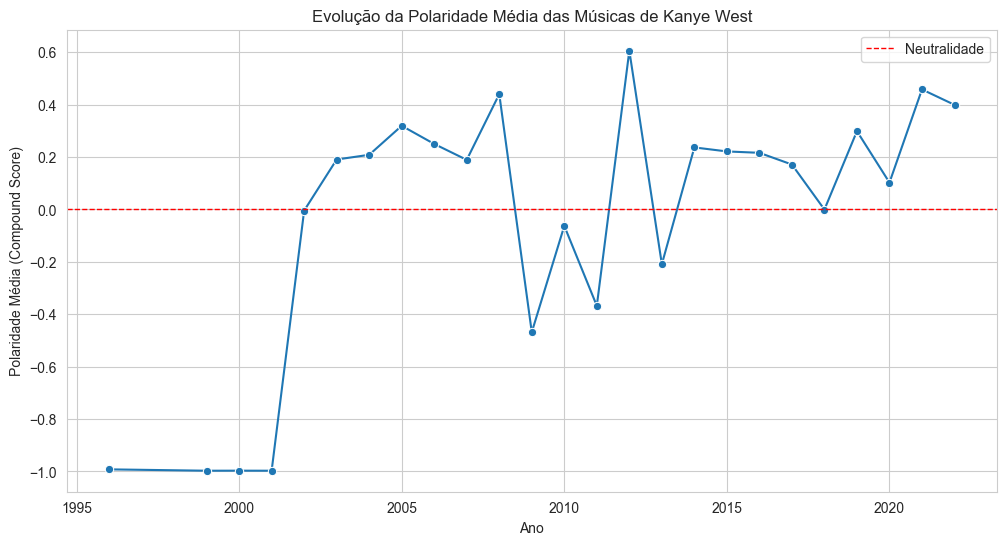


--- Análise de Variação de Polaridade (Artistas com > 15 músicas) ---
Top 10 Artistas com Maior Variação de Polaridade:
                   song_count  polarity_variation
artist                                           
morgxn                     17            1.010385
Ms Banks                   18            1.007872
R. City                    26            1.007118
Foreign Forest             17            1.006214
Deno                       23            1.004066
Baeza                      17            1.001861
CaRter                     16            1.000561
R-Mean                     16            0.999878
Moonshine Bandits          21            0.999479
Silkk the Shocker          17            0.999254

--- Análise de Correlação: Polaridade vs. Visualizações ---


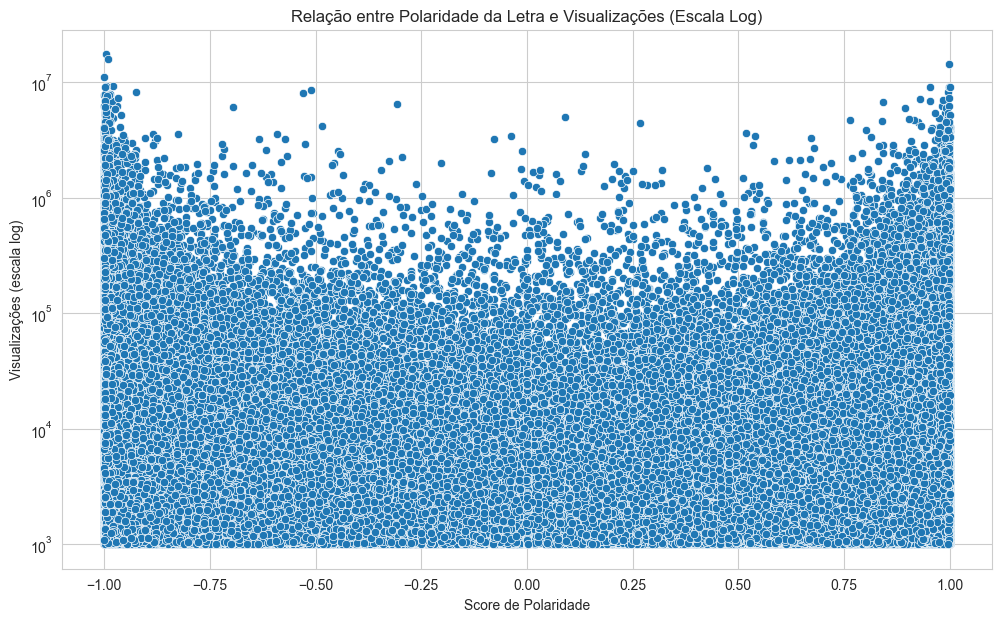


Matriz de Correlação de Spearman entre Polaridade e Views:
                polarity_score     views
polarity_score        1.000000 -0.019276
views                -0.019276  1.000000

Pipeline de Análise (Etapa 4) concluído com sucesso.


In [8]:
# ==============================================================================
# ETAPA 4: ANÁLISE DOS RESULTADOS (VERSÃO REATORADA)
# ==============================================================================

# --- 4.1: Importação das bibliotecas ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from typing import Optional

# --- 4.2: Definição das Funções de Análise ---

def analyze_artist_sentiment_over_time(
    df: pd.DataFrame, 
    artist_name: str, 
    output_dir: str = "imagens_analise"
) -> None:
    """
    Analisa e plota a evolução da polaridade de um artista específico ao longo do tempo.

    Args:
        df (pd.DataFrame): O DataFrame final contendo a coluna 'polarity_score'.
        artist_name (str): O nome exato do artista a ser analisado.
        output_dir (str): O diretório para salvar o gráfico gerado.
    """
    print(f"\n--- Análise Temporal para o artista: {artist_name} ---")
    
    df_artist = df[df['artist'] == artist_name]
    
    if df_artist.empty:
        print(f"AVISO: Artista '{artist_name}' não foi encontrado na base de dados. Nenhuma análise temporal foi gerada.")
        return

    # Agrupa por ano e calcula a média da polaridade
    artist_polarity_over_time = df_artist.groupby('year')['polarity_score'].mean().reset_index()

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=artist_polarity_over_time, x='year', y='polarity_score', marker='o')
    plt.title(f'Evolução da Polaridade Média das Músicas de {artist_name}')
    plt.xlabel('Ano')
    plt.ylabel('Polaridade Média (Compound Score)')
    plt.axhline(0, color='red', linestyle='--', lw=1, label='Neutralidade')
    plt.legend()
    
    # Garante que o diretório de saída exista
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Salva o gráfico
    safe_artist_name = re.sub(r'[^a-zA-Z0-9_]', '_', artist_name) # Limpa o nome do artista para o nome do arquivo
    plt.savefig(os.path.join(output_dir, f'analise_temporal_{safe_artist_name}.png'), dpi=300, bbox_inches='tight')
    plt.show()

def find_artists_with_highest_variation(df: pd.DataFrame, min_songs: int = 10) -> Optional[pd.DataFrame]:
    """
    Identifica os artistas com a maior variação de sentimento em suas músicas.

    A variação é medida pelo desvio padrão (std) dos scores de polaridade.

    Args:
        df (pd.DataFrame): O DataFrame final com os scores de sentimento.
        min_songs (int): O número mínimo de músicas que um artista deve ter para
                         ser incluído na análise.

    Returns:
        Optional[pd.DataFrame]: Um DataFrame com as estatísticas dos artistas,
        ordenado pela variação, ou None se nenhum artista atender aos critérios.
    """
    print(f"\n--- Análise de Variação de Polaridade (Artistas com > {min_songs} músicas) ---")
    
    artist_stats = df.groupby('artist')['polarity_score'].agg(['count', 'std']).rename(
        columns={'count': 'song_count', 'std': 'polarity_variation'}
    )
    
    relevant_artists = artist_stats[artist_stats['song_count'] > min_songs].sort_values(
        by='polarity_variation', ascending=False
    )
    
    if relevant_artists.empty:
        print(f"AVISO: Nenhum artista encontrado com mais de {min_songs} músicas.")
        return None
        
    print("Top 10 Artistas com Maior Variação de Polaridade:")
    print(relevant_artists.head(10))
    return relevant_artists

def analyze_correlation_polarity_views(df: pd.DataFrame, output_dir: str = "imagens_analise") -> None:
    """
    Analisa e visualiza a correlação entre a polaridade e as visualizações.

    Args:
        df (pd.DataFrame): O DataFrame final.
        output_dir (str): O diretório para salvar o gráfico gerado.
    """
    print("\n--- Análise de Correlação: Polaridade vs. Visualizações ---")
    
    # Gráfico de Dispersão
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data=df, x='polarity_score', y='views')
    plt.yscale('log') # Escala logarítmica no eixo Y para melhor visualização
    plt.title('Relação entre Polaridade da Letra e Visualizações (Escala Log)')
    plt.xlabel('Score de Polaridade')
    plt.ylabel('Visualizações (escala log)')
    plt.axhline(0, color='red', linestyle='--', lw=1)
    
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    plt.savefig(os.path.join(output_dir, 'correlacao_polaridade_views.png'), dpi=300, bbox_inches='tight')
    plt.show()
    
    # Matriz de Correlação
    correlation = df[['polarity_score', 'views']].corr(method='spearman')
    print("\nMatriz de Correlação de Spearman entre Polaridade e Views:")
    print(correlation)

# ==============================================================================
# BLOCO DE EXECUÇÃO DA ETAPA 4
# ==============================================================================

# --- Configurações da Etapa 4 ---
ARTIST_TO_ANALYZE = "Kanye West"  # Artista escolhido para a análise temporal
MIN_SONGS_FOR_VARIATION = 15       # Mínimo de músicas para a análise de variação

# Verifica se a variável da etapa anterior existe antes de executar
try:
    if 'df_final' in locals() and df_final is not None:
        print("\n" + "="*50)
        print("INICIANDO ETAPA 4: ANÁLISE DOS RESULTADOS DE SENTIMENTO")
        print("="*50)

        # 1. Análise temporal do artista escolhido
        analyze_artist_sentiment_over_time(df_final, artist_name=ARTIST_TO_ANALYZE, output_dir=ANALYSIS_IMG_DIR)
        
        # 2. Análise de variação entre todos os artistas
        find_artists_with_highest_variation(df_final, min_songs=MIN_SONGS_FOR_VARIATION)
        
        # 3. Análise de correlação
        analyze_correlation_polarity_views(df_final, output_dir=ANALYSIS_IMG_DIR)
        
        print("\nPipeline de Análise (Etapa 4) concluído com sucesso.")

    else:
        # Este 'else' é acionado se a variável df_final existe mas é None
        print("\nAVISO: A variável 'df_final' é nula. A Etapa 4 não pode ser executada.")

except NameError:
    print("\nERRO: A variável 'df_final' não foi encontrada.")
    print("Por favor, execute a célula da Etapa 3 (Análise de Sentimento) antes de executar esta célula.")

In [6]:
# ==============================================================================
# ETAPA 5: EXPORTAR DADOS DE UM ARTISTA ESPECÍFICO
# ==============================================================================

# --- 5.1: Definição da Função de Exportação ---

def export_artist_data_to_csv(
    df: pd.DataFrame, 
    artist_name: str, 
    output_dir: str = "export"
) -> None:
    """
    Filtra os dados de um artista específico e os salva em um arquivo CSV.

    Args:
        df (pd.DataFrame): O DataFrame completo de onde os dados serão extraídos.
                           (Pode ser o bruto, processado ou final).
        artist_name (str): O nome exato do artista a ser exportado.
        output_dir (str): O diretório onde o arquivo CSV será salvo.

    Returns:
        None. A função salva um arquivo e imprime o status no console.
    """
    print(f"\n--- Exportando dados para o artista: {artist_name} ---")
    
    if df is None or df.empty:
        print("Exportação não pode ser realizada: DataFrame de entrada é nulo ou vazio.")
        return

    # Filtra o DataFrame para o artista especificado
    artist_df = df[df['artist'] == artist_name]

    if artist_df.empty:
        print(f"AVISO: Artista '{artist_name}' não foi encontrado na base de dados. Nenhum arquivo foi gerado.")
        return

    # Garante que o diretório de saída exista
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"Diretório '{output_dir}' criado.")

    # Cria um nome de arquivo seguro a partir do nome do artista
    safe_artist_name = re.sub(r'[^a-zA-Z0-9_]', '_', artist_name)
    output_path = os.path.join(output_dir, f"dados_{safe_artist_name}.csv")

    try:
        # Salva o DataFrame filtrado em um arquivo CSV
        artist_df.to_csv(output_path, index=False, encoding='utf-8-sig')
        print(f"Sucesso! {len(artist_df)} registros do artista '{artist_name}' foram salvos em:")
        print(output_path)
    except Exception as e:
        print(f"ERRO: Falha ao salvar o arquivo CSV. Motivo: {e}")


# ==============================================================================
# BLOCO DE EXECUÇÃO DA ETAPA 5
# ==============================================================================

# --- Configurações da Etapa 5 ---
ARTIST_TO_EXPORT = "Kanye West"  # Mude para o artista que deseja exportar

# Verifica se a variável do DataFrame principal existe antes de executar
try:
    # Use o DataFrame que preferir:
    # raw_lyrics_df (bruto)
    # processed_lyrics_df (pré-processado)
    # df_final (com sentimento)
    
    # Exemplo usando o DataFrame final com scores de sentimento
    if 'df_final' in locals() and df_final is not None:
        export_artist_data_to_csv(
            df_final, 
            artist_name=ARTIST_TO_EXPORT, 
            output_dir=EXPORT_DIR
        )
    else:
        print("\nAVISO: A variável 'df_final' é nula ou não existe. A Etapa 5 não pode ser executada.")
        print("Execute as etapas anteriores primeiro.")

except NameError:
    print("\nERRO: A variável 'df_final' não foi encontrada.")
    print("Por favor, execute as etapas anteriores (1, 2 e 3) antes de executar esta célula.")


--- Exportando dados para o artista: Kanye West ---
Diretório '..\export' criado.
Sucesso! 575 registros do artista 'Kanye West' foram salvos em:
..\export\dados_Kanye_West.csv


In [7]:
# ==============================================================================
# ETAPA EXTRA: PREDIÇÃO DE GÊNERO MUSICAL
# ==============================================================================

# --- Importações adicionais do Scikit-learn ---
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from typing import Tuple

# --- Definição das Funções ---

def prepare_genre_prediction_data(df: pd.DataFrame, top_n_genres: int = 5) -> Tuple:
    """
    Prepara e divide os dados para a tarefa de classificação de gênero.

    A função foca nos N gêneros mais comuns para garantir que o modelo tenha
    dados suficientes para aprender de cada categoria.

    Args:
        df (pd.DataFrame): O DataFrame final (com a coluna 'lyrics_clean').
        top_n_genres (int): O número de gêneros mais populares a serem usados.

    Returns:
        Tuple: Uma tupla contendo X_train, X_test, y_train, y_test.
    """
    print(f"\n--- Preparando dados para predição dos Top {top_n_genres} Gêneros ---")
    
    # 1. Encontrar os N gêneros mais comuns
    top_genres = df['tag'].value_counts().nlargest(top_n_genres).index
    print(f"Gêneros selecionados: {list(top_genres)}")
    
    # 2. Filtrar o DataFrame para conter apenas esses gêneros
    df_genre = df[df['tag'].isin(top_genres)].copy()
    print(f"Total de amostras para treinamento/teste: {len(df_genre)}")
    
    # 3. Definir features (X) e o alvo (y)
    X = df_genre['lyrics_clean']
    y = df_genre['tag']
    
    # 4. Dividir os dados em conjuntos de treino e teste (80% treino, 20% teste)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    print(f"Tamanho do conjunto de treino: {len(X_train)}")
    print(f"Tamanho do conjunto de teste: {len(X_test)}")
    
    return X_train, X_test, y_train, y_test

def train_and_evaluate_genre_predictor(X_train, X_test, y_train, y_test) -> None:
    """
    Treina um modelo de classificação de texto e avalia sua performance.

    Utiliza TF-IDF para vetorizar o texto e um classificador Naive Bayes.
    """
    print("\n--- Treinando e Avaliando o Modelo Classificador ---")
    
    # 1. Vetorização com TF-IDF
    print("Vetorizando o texto com TF-IDF...")
    vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)
    
    # 2. Treinamento do Modelo Naive Bayes
    print("Treinando o modelo Multinomial Naive Bayes...")
    model = MultinomialNB()
    model.fit(X_train_tfidf, y_train)
    
    # 3. Previsão e Avaliação
    print("Realizando previsões no conjunto de teste...")
    y_pred = model.predict(X_test_tfidf)
    
    # 4. Exibição dos Resultados
    print("\n--- Relatório de Classificação ---")
    # O relatório mostra precisão, recall e f1-score para cada gênero.
    print(classification_report(y_test, y_pred))


# ==============================================================================
# BLOCO DE EXECUÇÃO DA ETAPA EXTRA
# ==============================================================================

# --- Configurações ---
# Vamos focar nos 5 gêneros mais comuns para ter um modelo mais robusto
TOP_N_GENRES_TO_PREDICT = 5

try:
    if 'df_final' in locals() and df_final is not None:
        # 1. Preparar os dados
        X_train, X_test, y_train, y_test = prepare_genre_prediction_data(
            df_final, 
            top_n_genres=TOP_N_GENRES_TO_PREDICT
        )
        
        # 2. Treinar e avaliar o modelo
        train_and_evaluate_genre_predictor(X_train, X_test, y_train, y_test)

    else:
        print("\nAVISO: A variável 'df_final' é nula ou não existe. A predição de gênero não pode ser executada.")

except NameError:
    print("\nERRO: A variável 'df_final' não foi encontrada.")
    print("Por favor, execute as etapas anteriores antes de executar esta célula.")


--- Preparando dados para predição dos Top 5 Gêneros ---
Gêneros selecionados: ['pop', 'rap', 'rock', 'rb', 'country']
Total de amostras para treinamento/teste: 543049
Tamanho do conjunto de treino: 434439
Tamanho do conjunto de teste: 108610

--- Treinando e Avaliando o Modelo Classificador ---
Vetorizando o texto com TF-IDF...


KeyboardInterrupt: 

In [ ]:
# ==============================================================================
# ETAPA EXTRA: PREDIÇÃO DE GÊNERO MUSICAL (APRIMORANDO A SAÍDA)
# ==============================================================================

# --- Importações adicionais do Scikit-learn ---
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from typing import Tuple

# --- Definição das Funções ---

def prepare_data_with_undersampling(df: pd.DataFrame, top_n_genres: int = 5) -> Optional[Tuple]:
    """
    Prepara os dados para classificação de gênero, aplicando a técnica de undersampling
    para criar um dataset balanceado.

    Args:
        df (pd.DataFrame): O DataFrame final (com a coluna 'lyrics_clean').
        top_n_genres (int): O número de gêneros mais populares a serem usados.

    Returns:
        Optional[Tuple]: Uma tupla contendo X_train, X_test, y_train, y_test,
                         ou None se os dados de entrada forem inválidos.
    """
    if df is None or df.empty:
        print("Preparação de dados não pode ser realizada: DataFrame de entrada é nulo ou vazio.")
        return None

    print(f"\n--- Preparando dados para predição dos Top {top_n_genres} Gêneros COM UNDERSAMPLING ---")
    
    # 1. Filtrar o DataFrame para conter apenas os N gêneros mais comuns
    top_genres = df['tag'].value_counts().nlargest(top_n_genres).index
    print(f"Gêneros selecionados: {list(top_genres)}")
    df_genre = df[df['tag'].isin(top_genres)].copy()

    # 2. Encontrar o tamanho da menor classe
    min_class_size = df_genre['tag'].value_counts().min()
    print(f"O tamanho da menor classe ('{df_genre['tag'].value_counts().idxmin()}') é: {min_class_size} amostras.")
    print("Aplicando undersampling para que todas as classes tenham este tamanho...")

    # 3. %%% LÓGICA DE UNDERSAMPLING ADICIONADA AQUI %%%
    # Agrupa por gênero e pega uma amostra aleatória de tamanho `min_class_size` de cada grupo.
    df_balanced = df_genre.groupby('tag', group_keys=False).apply(lambda x: x.sample(min_class_size, random_state=42))

    print("Distribuição das classes após o balanceamento:")
    print(df_balanced['tag'].value_counts())
    
    # 4. Definir features (X) e o alvo (y) a partir do novo DataFrame balanceado
    X = df_balanced['lyrics_clean']
    y = df_balanced['tag']
    
    # 5. Dividir os dados em conjuntos de treino e teste
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    print(f"\nTamanho do conjunto de treino: {len(X_train)}")
    print(f"Tamanho do conjunto de teste: {len(X_test)}")
    
    return X_train, X_test, y_train, y_test

def prepare_genre_prediction_data(df: pd.DataFrame, top_n_genres: int = 5) -> Tuple:
    """
    Prepara e divide os dados para a tarefa de classificação de gênero.

    A função foca nos N gêneros mais comuns para garantir que o modelo tenha
    dados suficientes para aprender de cada categoria.

    Args:
        df (pd.DataFrame): O DataFrame final (com a coluna 'lyrics_clean').
        top_n_genres (int): O número de gêneros mais populares a serem usados.

    Returns:
        Tuple: Uma tupla contendo X_train, X_test, y_train, y_test.
    """
    print(f"\n--- Preparando dados para predição dos Top {top_n_genres} Gêneros ---")
    
    # 1. Encontrar os N gêneros mais comuns
    top_genres = df['tag'].value_counts().nlargest(top_n_genres).index
    print(f"Gêneros selecionados: {list(top_genres)}")
    
    # 2. Filtrar o DataFrame para conter apenas esses gêneros
    df_genre = df[df['tag'].isin(top_genres)].copy()
    print(f"Total de amostras para treinamento/teste: {len(df_genre)}")
    
    # 3. Definir features (X) e o alvo (y)
    X = df_genre['lyrics_clean']
    y = df_genre['tag']
    
    # 4. Dividir os dados em conjuntos de treino e teste (80% treino, 20% teste)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    print(f"Tamanho do conjunto de treino: {len(X_train)}")
    print(f"Tamanho do conjunto de teste: {len(X_test)}")
    
    return X_train, X_test, y_train, y_test

def train_and_evaluate_genre_predictor(X_train, X_test, y_train, y_test) -> None:
    """
    Treina um modelo de classificação de texto e avalia sua performance.

    Utiliza TF-IDF para vetorizar o texto e um classificador Naive Bayes.
    """
    print("\n--- Treinando e Avaliando o Modelo Classificador ---")
    
    # 1. Vetorização com TF-IDF
    print("Vetorizando o texto com TF-IDF...")
    vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)
    
    # 2. Treinamento do Modelo Naive Bayes
    print("Treinando o modelo Multinomial Naive Bayes...")
    model = MultinomialNB()
    model.fit(X_train_tfidf, y_train)
    
    # 3. Previsão e Avaliação
    print("Realizando previsões no conjunto de teste...")
    y_pred = model.predict(X_test_tfidf)
    
    # 4. Exibição dos Resultados
    print("\n--- Relatório de Classificação ---")
    # O relatório mostra precisão, recall e f1-score para cada gênero.
    print(classification_report(y_test, y_pred))


# ==============================================================================
# BLOCO DE EXECUÇÃO DA ETAPA EXTRA
# ==============================================================================

# --- Configurações ---
# Vamos focar nos 5 gêneros mais comuns para ter um modelo mais robusto
TOP_N_GENRES_TO_PREDICT = 5

try:
    if 'df_final' in locals() and df_final is not None:
        # 1. Preparar os dados (usando a nova função com undersampling)
        # Mude para True se quiser normalizar a base de dados de treianmento de modo que todos os gêneros tenham o mesmo número de dados.
        if False:
            prepared_data = prepare_data_with_undersampling(
            df_final, 
            top_n_genres=TOP_N_GENRES_TO_PREDICT
        )
        
        if prepared_data:
            X_train, X_test, y_train, y_test = prepared_data
            
            # 2. Treinar e avaliar o modelo (esta função não muda)
            train_and_evaluate_genre_predictor(X_train, X_test, y_train, y_test)
        
        else:
            X_train, X_test, y_train, y_test = prepare_genre_prediction_data(
            df_final, 
            top_n_genres=TOP_N_GENRES_TO_PREDICT
            )
            train_and_evaluate_genre_predictor(X_train, X_test, y_train, y_test)

    else:
        print("\nAVISO: A variável 'df_final' é nula ou não existe. A predição de gênero não pode ser executada.")

except NameError:
    print("\nERRO: A variável 'df_final' não foi encontrada.")
    print("Por favor, execute as etapas anteriores antes de executar esta célula.")